In [1]:
#NishiSolanki.
#Regression: CART.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

In [3]:
#Reading dataset csv.
dataset=pd.read_csv('PCOS_data_without_infertility.csv')

In [4]:
#Remove SI No. and patient file no.
#Remove unnamed because it is an extra row.
#Remove left and right follicle numbers since too correlated to the average number.
dataset = dataset.drop('Sl. No', axis=1)
dataset = dataset.drop('Patient File No.', axis=1)
dataset = dataset.drop('Unnamed: 45', axis=1)
dataset = dataset.drop('Follicle No. (R)', axis=1)
dataset = dataset.drop('Follicle No. (L)', axis=1)

#Remove any NaN values from dataset before taking train_test_split.
dataset.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
#Setting target to be the average follicle number (average of L and R).
y=dataset['Follicle No. (Ave)']
X=dataset.loc[:,dataset.columns!="Follicle No. (Ave)"]

#train_test_split between dataset.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [7]:
#CART: Using coding example from class, and scikit_learn.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils

In [11]:
#Processing y_train data for classification, cannot be continuous data.
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

In [12]:
#Create Decision Tree classifer object.
clf = DecisionTreeClassifier(max_depth = 20, random_state = 40, criterion='gini', splitter='best') 

#Training model with train dataset.
clf = clf.fit(x_train,y_train)
 
#Predict the response for train and test dataset.
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

In [13]:
#Regression Model metrics, R2 score and RMSE for model comparison in final report.
print("Training R2:", r2_score(y_train[:161], y_pred_train[:161]))
print("RMSE_Training:",math.sqrt(mean_squared_error(y_train[:161], y_pred_train[:161])))

print("Testing R2:", r2_score(y_test, y_pred_test))
print("RMSE_Testing:",math.sqrt(mean_squared_error(y_test, y_pred_test)))

Training R2: 1.0
RMSE_Training: 0.0
Testing R2: -3.46097429918386
RMSE_Testing: 9.155885916369877


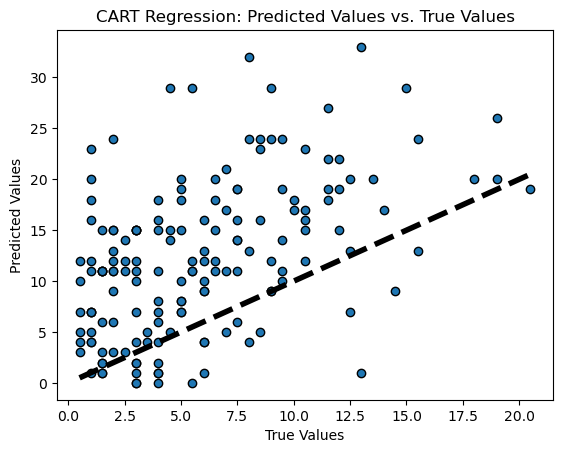

In [14]:
from sklearn.model_selection import cross_val_predict

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')
plt.title("CART Regression: Predicted Values vs. True Values")
plt.show()